In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [158]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
# Start cov
def f(x, theta):
    # x_reshaped = np.reshape(x, (x.shape[0], 1))
    # zeros = np.zeros((x.shape[0], 1))
    # x_aug = np.concatenate((x_reshaped, zeros), axis=1)
    return x @ theta

In [268]:
def get_theta(X, y, covariance_prior):
    var_y = np.var(y) * np.eye(len(y))
    mean_theta = covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ y
    #print(covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ y)
    cov_theta = covariance_prior - covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ X @ covariance_prior
    #print(mean_theta, cov_theta)
    return mean_theta, cov_theta
#plt.scatter(X[:,0], X[:,1])
# Evaluate the Gaussian density at each point on the grid
#z = np.exp(-0.5 * np.sum((xy - mean) @ np.linalg.inv(covariance) * (xy - mean), axis=1))
#print(stats.multivariate_normal.pdf(xy[0], mean=xy[0].T @ mean_new, cov=np.var(y) + xy[0].T @ cov_new @ xy[0]))
#z = np.array([stats.multivariate_normal.pdf(x, mean=x.T @ mean_new, cov=np.var(y) + x.T @ cov_new @ x) for x in xy])
#z = z.reshape(xgrid.shape)

def plot_predicative(mean, cov, x, y):
    # Define the grid for the contour plot
    plt.scatter(x, y, alpha=0.7)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    x_grid, y_grid = np.mgrid[xmin:xmax:.1, ymin:ymax:.1]

    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid
    #print(np.dstack((x_grid, y_grid)))
    z = []

    # Create a multivariate normal distribution
    for row in np.dstack((x_grid, y_grid)):
        row_z = []
        for [x_p, y_p] in row:
            #p = np.array([x_var, y_var])
            x_p = np.array([x_p, 1])
            rv = stats.multivariate_normal(x_p.T @ mean, np.var(y) + x_p.T @ cov @ x_p)
            # Evaluate the probability density function on the grid
            row_z.append(rv.pdf(y_p))
        z.append(np.array(row_z))
    z = np.array(z).reshape(x_grid.shape)
    # Plot the scatter plot
    plt.contour(x_grid, y_grid, z)
    ones = np.ones((len(np.linspace(xmin, xmax)), 1))
    x_aug = np.concatenate((np.linspace(xmin, xmax).reshape(len(ones), 1), ones), axis=1)
    #plt.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, mean), c='purple', label="Mean Parameter Estimate")
    #plt.legend()
    plt.title("Posterior Predicative for $\ell=" + str(len(y)) + "$")
    plt.show()


In [177]:
def plot_line_samples(mean, cov, x, y, prior_cov, prior_mean):
    # Define the grid for the contour plot
    fig, ax = plt.subplots()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    text_string = r'$\Sigma_\theta = \begin{bmatrix} %.2f & %.2f \\ %.2f & %.2f \end{bmatrix}$\\ $\mu_\theta = [%.2f, %.2f]^T$' % (prior_cov[0][0], prior_cov[0][1], prior_cov[1][0], prior_cov[1][1], prior_mean[0], prior_mean[1])
    #print(np.dstack((x_grid, y_grid)))
    z = []
    ones = np.ones((len(np.linspace(xmin, xmax)), 1))
    x_aug = np.concatenate((np.linspace(xmin, xmax).reshape(len(ones), 1), ones), axis=1)
    ax.scatter(x, y, alpha=0.7)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.60, 0.95, text_string, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    for i in range(20):
        sample = np.random.multivariate_normal(mean[:, 0], cov)
        ax.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, sample), alpha=0.2)
    # plt.legend()
    ax.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, mean), alpha=1, label='Mean')
    ax.set_title("20 samples from $p(\\theta | \mathcal{D})$ for $\ell=" + str(len(y)) + "$")

In [252]:
def plot_sampled_priors(x, y):
    # Define the grid for the contour plot
    fig, ax = plt.subplots()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    #text_string = r'$\Sigma_\theta = \begin{bmatrix} %.2f & %.2f \\ %.2f & %.2f \end{bmatrix}$\\ $\mu_\theta = [%.2f, %.2f]^T$' % (prior_cov[0][0], prior_cov[0][1], prior_cov[1][0], prior_cov[1][1], prior_mean[0], prior_mean[1])
    #print(np.dstack((x_grid, y_grid)))
    ones = np.ones((len(np.linspace(xmin, xmax)), 1))
    x_aug = np.concatenate((np.linspace(xmin, xmax).reshape(len(ones), 1), ones), axis=1)
    ax.scatter(x[:,0].reshape([l, 1]), y, alpha=0.7)
    #props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    #ax.text(0.60, 0.95, text_string, transform=ax.transAxes, fontsize=14,
    #    verticalalignment='top', bbox=props)
    covs = []
    for i in range(100):
        sample_cov = (np.random.random_sample([2,2])-np.array([[0.5, 0.5],[0.5, 0.5]])) * 50
        if np.all(np.linalg.eigvals(sample_cov) >= 0):
            new_mean, new_cov = get_theta(x,y, sample_cov)
            covs.append((sample_cov, new_mean))
            ax.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, new_mean), alpha=0.2, c='red', label="Mean parameter estimate")
    # plt.legend()
    #ax.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, mean), alpha=1, label='Mean')
    ax.set_title(str(len(covs)) + " sampled priors from $\mathcal{U}_{[-25,25]}^{2\\times 2}$ for $\ell=" + str(len(y)) + "$")
    return ax, covs

# Spread of points along a line

Gaussian distribution, tight variance

1.0450766204963646


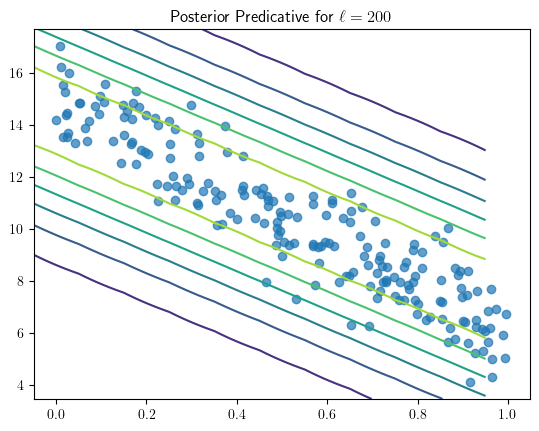

In [267]:
d = 2
l = 200

true_weights = np.array([-9, 15])

np.random.seed(12345)
x = np.random.rand(l)
ones = np.ones((x.shape[0], 1))
x = np.concatenate((np.reshape(x, (x.shape[0], 1)), ones), axis=1)
y = np.random.normal(loc = 0, scale=np.sqrt(1.2), size=l).reshape([l, 1]) + true_weights[0] * x[:, 0].reshape([l,1]) + true_weights[1] # Linear function with slope 1 added noise epsilon

X = np.concatenate((x, y), axis=1)
cov_prior = np.array([[0.9, 0.3], [0.3, -3]])
mean_new, cov_new = get_theta(x, y, cov_prior)
plot_predicative(mean_new, cov_new, x[:,0].reshape([l, 1]), y)

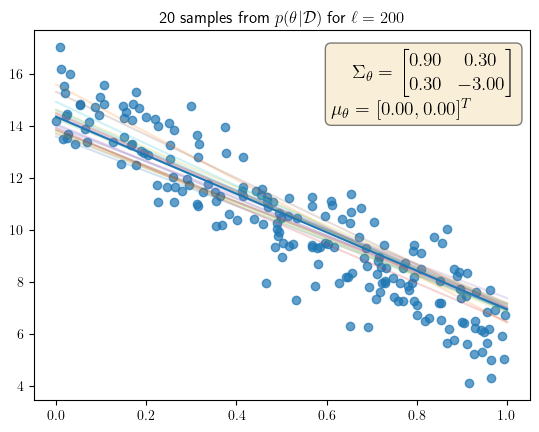

In [208]:
plot_line_samples(mean_new, cov_new, x[:,0].reshape([l, 1]), y, cov_prior, [0, 0])

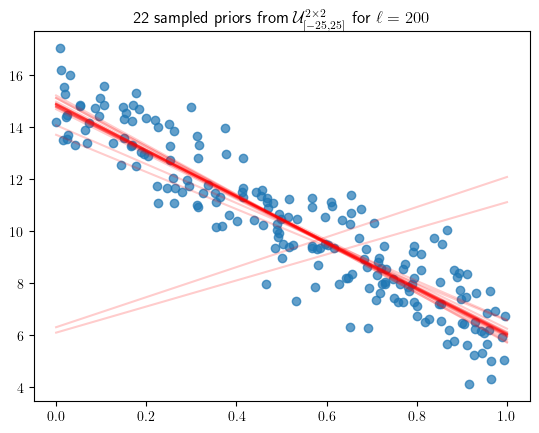

In [253]:
ax, covs = plot_sampled_priors(x, y)

[59.87884369756541, 59.40697894655505, 72.42549706277956, 45.89201357028347, 58.99994483259982, 56.57395994835461, 41.351847126775695, 58.64863272292973, 67.5106647053525, 61.40587709099742, 43.97999918853589, 58.233759729446454, 81.77050765760686, 65.72247026419807, 46.545044444810856, 78.08250370639516, 30.15991826083628, 64.96810915554963, 39.94424476523132, 68.8411086727021, 36.08248294936138, 39.20741790505919, 66.9660122467117, 63.30223386335693, 38.488685012468466, 46.119065184228184, 58.016681320370694, 48.45909001785796, 59.03308860682239, 68.21194927122771, 45.93315767532479, 47.058141062822564, 53.03177895835394, 53.35098172946226, 54.59017348689305, 58.100755200113134, 35.50844187279601, 47.9266006391658, 68.64846512184192, 65.217454769673, 69.86356787296495, 32.65653060627923, 50.12449671127319, 47.79781621020059, 65.81499850488292, 47.02092220643182, 64.27012392274229, 42.336109269330116, 62.32115491924378, 61.86073400748124, 91.20263919658892, 32.709598275416674, 40.5659

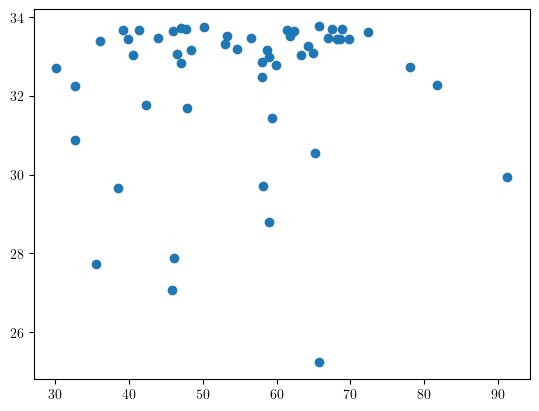

In [240]:
xs = [np.linalg.norm(cov) for (cov, _) in covs]
ys = [np.linalg.norm(true_weights - new_mean) for (_, new_mean) in covs]
sort()
plt.scatter(xs, ys)

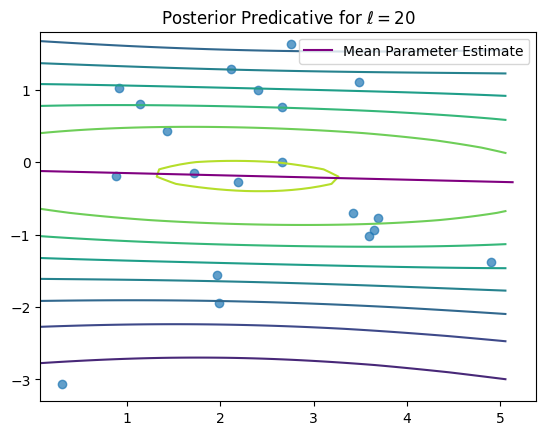

In [39]:
d = 2
l = 20
np.random.seed(123)
x = np.random.rand(l) * 5
ones = np.ones((x.shape[0], 1))
x = np.concatenate((np.reshape(x, (x.shape[0], 1)), ones), axis=1)
y = np.random.normal(loc = 0, scale=np.sqrt(1.2), size=l).reshape([l, 1]) # Linear function with slope 1 added noise epsilon

X = np.concatenate((x, y), axis=1)
cov_prior = np.array([[7, 1.5], [1.5, 2]])
mean = 0

mean_new, cov_new = get_theta(x, y, cov_prior)
plot_predicative(mean_new, cov_new, x[:,0].reshape([l, 1]), y)